In [1]:
# Import Matplotlib library
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import numpy, pandas, datetime libraries 
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(latest_date.date)

2017-08-23


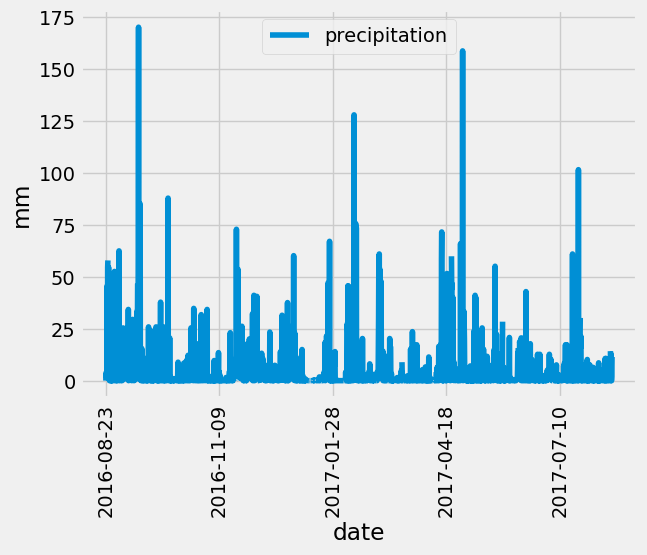

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= '2016-08-23').all()   

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= '2016-08-23').\
order_by(Measurement.date).all() 
prcp_scores_df = pd.DataFrame(prcp_scores, columns=['date','prcp'])

# Sort the dataframe by date
prcp_scores_df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores_df.plot()
plt.grid(True)
plt.xticks(rotation=90)
plt.ylabel("mm")
plt.legend(["precipitation"], loc="best")
plt.show()

In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_scores_df.describe()

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).distinct().count()
print(f"Total amount of stations equals {total_stations}.")

Total amount of stations equals 9.


In [33]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.station), 
       ]
most_active_stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

print(f"The lowest temperature for the most active station is {min_temp}.")
print(f"The highest temperature for the most active station is {max_temp}.")
print(f"The average temperature for the most active station is {avg_temp}.")

The lowest temperature for the most active station is [(12.2,)].
The highest temperature for the most active station is [(29.4,)].
The average temperature for the most active station is [(22.03582251082252,)].


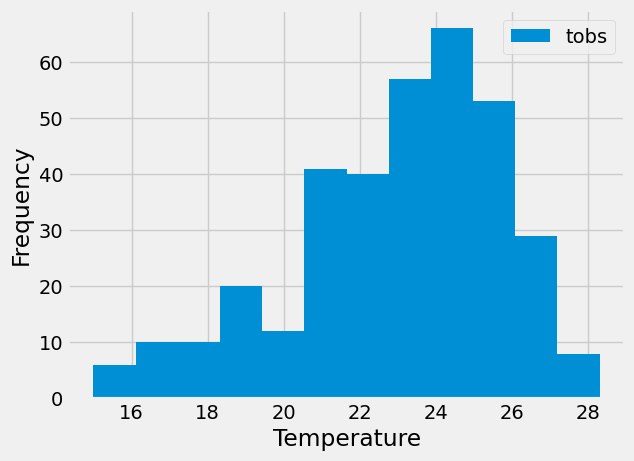

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year_tobs = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").\
                                filter(Measurement.date>= query_date).all()
                              
last_year_tobs_df = pd.DataFrame(last_year_tobs,  columns=['tobs'])
plt.hist(last_year_tobs_df, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"], loc="best")
plt.show()


# Close Session

In [26]:
# Close Session
session.close()